##  Ying-Yu HW5  

###  3. We now review $k$ -fold cross-validation.
####  a. Explain how $k$ -fold cross-validation is implemented.

#We divided our data into (approximately equal) $k$ subsets, and then generate predictions for each $k$th set, training on the exclusive $k$ sets combined.

#### b. What are the advantages and disadvantages of $k$-fold cross-validation relative to:
#####   i. The validation set approach?
##### ii. LOOCV?

  #In the validation set, we can only train on a small portion of the data as we must reserve the rest for validation. As a result it can overestimate the test error rate (assuming we then train using the complete data for future prediction). It is also sensitive to which observations are including in train vs. test. It is low cost in terms of processing time (as we only have to fit one model).
  
  #When using LOOCV, we can train on $n-1$ observations, however, the trained models we generate each differ only by the inclusion (and exclusion) of a single observation. As a result, LOOCV can have high variance (the models fit will be similar, and might be quite different to what we would obtain with a different data set). LOOCV is also costly in terms of processing time.


# 5.In Chapter 4, we used logistic regression to predict the probability of  `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.
## a. Fit a logistic regression model that uses `income` and `balance` to predict `default`.

In [97]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tools.tools as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

sns.set(style="white")
%matplotlib inline

In [40]:

import plotly.express as px

In [15]:
np.random.seed(13)
Default_location = "https://raw.githubusercontent.com/jasonm/islr-exercises/master/Data/Default.csv"
df = pd.read_csv(Default_location, index_col=0)

df['default_yes'] = (df['default'] == 'Yes').astype('int')
df.head()

,default,student,balance,income,default_yes
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      10000 non-null  object 
 1   student      10000 non-null  object 
 2   balance      10000 non-null  float64
 3   income       10000 non-null  float64
 4   default_yes  10000 non-null  int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 429.7+ KB


In [17]:
lr = LogisticRegression(C=10**6, tol=1e-6)
X = df[['income', 'balance']]
y = df['default_yes']
mod = lr.fit(X, y)
mod.coef_

array([[2.08089921e-05, 5.64710291e-03]])

### we did not pre-process the data. We dump all the data into logitic regression. we can use l2 regularization and set C to a very high number, effectively removing the regularization. We also compare the coefficients to the ones obtained from statsmodel LogisticRegression which has no regularization, and we verify that the coefficient estimates match.
### Another parameter we have to consider is the tolerance. In this case, the default 1e-4 is not enough to reach convergence, so we increased it until it did.
### Below we that the coefficients obtained with sklearn agree with those from statsmodels.

In [20]:
f = 'default_yes ~ income + balance'
res = smf.logit(formula=f, data=df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4594
Time:                        19:18:42   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# (b)
## i.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## ii.

In [50]:
mod = lr.fit(X_train, y_train)
mod.coef_

array([[2.14304625e-05, 5.80646262e-03]])

## iii.

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


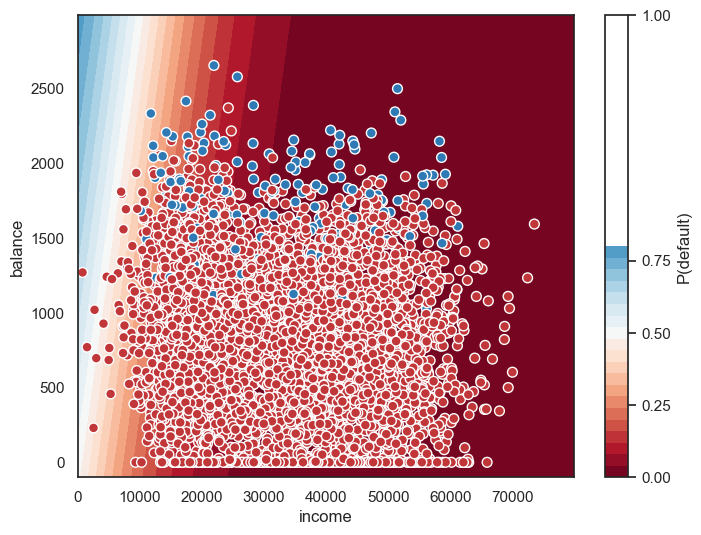

In [26]:
xx, yy = np.mgrid[0:80000:100, -100:3000:10]
grid = np.c_[xx.ravel(), yy.ravel()]                    # https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
probs = mod.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",    # 25 levels
                     vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("P(default)")
ax_c.set_ticks([0,0.25,0.5,.75,1])

ax.scatter(X_test['income'], X_test['balance'], c=y_test, s=50, 
          cmap="RdBu", vmin=-0.2, vmax=1.2,
          edgecolor="white", linewidth=1)

ax.set(xlabel="income", ylabel="balance");

# iv

In [51]:
y_pred = mod.predict(X_test) #using x_test to validate mod
1-(y_pred == y_test).mean()# get error rate.

0.02639999999999998

From figure above, it seems that the error rates are very different depending on whether we are considering a positive or a negative. Check confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDefault', 'PredNoDefault'],index=['Default','NoDefault'])

,PredDefault,PredNoDefault
Default,4816,27
NoDefault,105,52


# (c)c. Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
mod = lr.fit(X_train, y_train)
mod.coef_

array([[1.54981428e-05, 5.68601075e-03]])

In [42]:
y_pred = mod.predict(X_test) #using x_test to validate mod
1-(y_pred == y_test).mean()# get error rate.

0.030333333333333323

In [43]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDefault', 'PredNoDefault'],index=['Default','NoDefault'])

,PredDefault,PredNoDefault
Default,2877,13
NoDefault,78,32


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
mod = lr.fit(X_train, y_train)
mod.coef_

array([[2.41427906e-05, 6.03549247e-03]])

In [54]:
y_pred = mod.predict(X_test) #using x_test to validate mod
1-(y_pred == y_test).mean()# get error rate.

0.027249999999999996

In [55]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDefault', 'PredNoDefault'],index=['Default','NoDefault'])

,PredDefault,PredNoDefault
Default,3856,18
NoDefault,91,35


## d. Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.


In [57]:
default_df = pd.get_dummies(df, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)

display(default_df.head())

,balance,income,default_yes,default_Yes,student_Yes
1,729.526495,44361.625074,0,0.0,0.0
2,817.180407,12106.134700,0,0.0,1.0
3,1073.549164,31767.138947,0,0.0,0.0
4,529.250605,35704.493935,0,0.0,0.0
5,785.655883,38463.495879,0,0.0,0.0


In [61]:
f = 'default_Yes ~ income + balance+student_Yes'
res = smf.logit(formula=f, data=default_df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4619
Time:                        20:55:00   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance         0.0057      0.000     24.737      0.000       0.005       0.006
student_Yes    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
mod = lr.fit(X_train, y_train)
mod.coef_

array([[-0.00012748,  0.00047737]])

In [66]:
y_pred = mod.predict(X_test) #using x_test to validate mod
1-(y_pred == y_test).mean()# get error rate.

0.03166666666666662

In [67]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['PredDefault', 'PredNoDefault'],index=['Default','NoDefault'])

,PredDefault,PredNoDefault
Default,2905,3
NoDefault,92,0


From confusion matrix, adding variable 'student_Yes'improve the prediction of model.

# 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.
    (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [74]:
f = 'default_Yes ~ income + balance'
model_logit= smf.logit(formula=f, data=default_df).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4594
Time:                        21:22:09   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [75]:
statsmodels_est = pd.DataFrame({'coef_sm': model_logit.params, 'SE_sm': model_logit.bse})
display(statsmodels_est)

,coef_sm,SE_sm
Intercept,-11.540468,0.434772
income,0.000021,0.000005
balance,0.005647,0.000227


# (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [114]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(13)
Default_location = "https://raw.githubusercontent.com/jasonm/islr-exercises/master/Data/Default.csv"
df = pd.read_csv(Default_location, index_col=0)

df['default_yes'] = (df['default'] == 'Yes').astype('int')
df.head()

def boot_fn(df, idx):
    response   = 'default_Yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(np.array(df[predictors].loc[idx]))
    y = np.array(df[response].loc[idx]) 
       
    # Logistic regression
    try:
        model_logit = smf.Logit(y, X).fit(disp=False)
        return model_logit.params
    except Exception as e:
        print("Error:", e)
        return np.nan


# (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [120]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming boot_idx function is defined as provided earlier

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results.append(Z)
    return np.array(results)

def boot_fn(df, idx):
    response = 'default_yes'
    predictors = ['income', 'balance']
    
    X = sm.add_constant(df[predictors].iloc[idx])
    y = df[response].iloc[idx]
    
    try:
        model_logit = sm.Logit(y, X).fit(disp=False)
        return model_logit.params
    except Exception as e:
        print("Error:", e)
        return np.nan

# Reset index of the DataFrame
df_reset = df.reset_index(drop=True)

# Call boot function with boot_fn
B = 1000  # Number of bootstrap samples
coef_preds = boot(boot_fn, df_reset, samples=B)

# Calculate standard errors
coef_pred = np.mean(coef_preds, axis=0)
standard_errs = np.std(coef_preds, axis=0)


bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)

,coef_boot,SE_boot
0,-11.583070,0.416790
1,0.000021,0.000005
2,0.005666,0.000223


# Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

In [121]:
pd.concat([statsmodels_est, bootstrap_est], axis=1)


,coef_sm,SE_sm,coef_boot,SE_boot
Intercept,-11.540468,0.434772,NaN,NaN
income,0.000021,0.000005,NaN,NaN
balance,0.005647,0.000227,NaN,NaN
0,NaN,NaN,-11.583070,0.416790
1,NaN,NaN,0.000021,0.000005
2,NaN,NaN,0.005666,0.000223


# 9. We will now consider the Boston housing data set, from the MASS library.

In [128]:
import numpy as np
import pandas as pd
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
raw_df = pd.read_csv(data_url)
raw_df.head()
%matplotlib inline
boston = raw_df
# Check for missing values
#assert boston_df.isnull().sum().sum() == 0

boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [137]:
c = boston['medv'] 
mu = c.mean()

In [133]:
c.std()/np.sqrt(len(boston))

0.4088611474975351

In [135]:
means = [c.sample(n = len(boston), replace=True).mean() for _ in range(1000)]
np.std(means)

0.4252021036241484

In [138]:
SE = np.std(means)
print(mu - 2*SE, mu + 2*SE)

21.68240211686238 23.383210531358973


In [139]:
c.median()

21.2

In [140]:
medians = [c.sample(n = len(df), replace=True).median() for _ in range(1000)]
np.std(medians)

0.09110212675892859

In [143]:
c.quantile(.1)

12.75

In [142]:
quantiles = [c.sample(n = len(df), replace=True).quantile(.1) for _ in range(1000)]
np.std(quantiles)

0.13034564472969615